## Exercise 2.5

In this task you will investigate the effect of windowing. Use 1024 samples for FFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Compute the DFT of the signal $x[n]=cos(\pi n/4)$. Use sampling frequency $f_s = 4096Hz$. Plot the magnitude and phase spectrum of $x[n]$

In [2]:
def plot_signal_and_spectrum(s, fft_size, title='Initial signal'):
    ''' helper function for visualizations'''
    spec = np.fft.fft(s, fft_size)

    mag_spec = np.abs(spec)             # magnitude spectrum
    phase_spec = np.angle(spec)         # phase spectrum

    plt.subplots(2, 2, figsize=(10, 3))

    plt.subplot(211)
    plt.plot(s[:512])
    plt.ylim([-1.5, 1.5])
    plt.title(title)
    plt.grid()

    plt.subplot(223)
    plt.xlabel('Freq [Hz]')
    plt.ylabel('Magnitude')
    plt.xlim(0, fft_size // 2)
    plt.plot(mag_spec[:fft_size//2])
    plt.grid()

    plt.subplot(224)
    plt.xlabel('Freq [Hz]')
    plt.ylabel('Phase [radians]')
    plt.xlim(0, fft_size // 2)
    plt.plot(np.unwrap(phase_spec[:fft_size//2]))
    plt.grid()


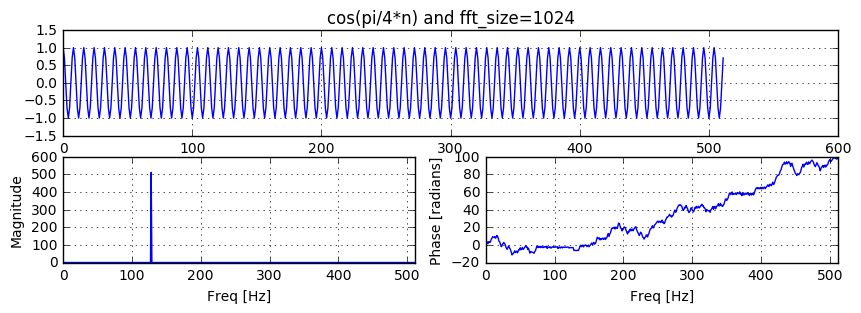

In [3]:
fs = 4096
fft_size = 1024
window_size = 93

n = np.arange(fs)
s = np.cos(np.pi / 4 * n)

plot_signal_and_spectrum(s, fft_size, 'cos(pi/4*n) and fft_size=1024')


Truncate $x[n]$ using Hamming window of size 93. Plot its magnitude and phase spectrum

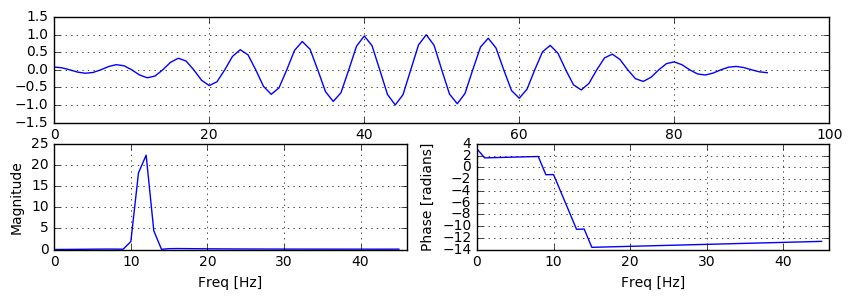

In [4]:
weighted = s[:window_size] * np.hamming(window_size)

plot_signal_and_spectrum(weighted, window_size, '')


However, FFT is usually computed for *power-of-2* sized arrays, so:

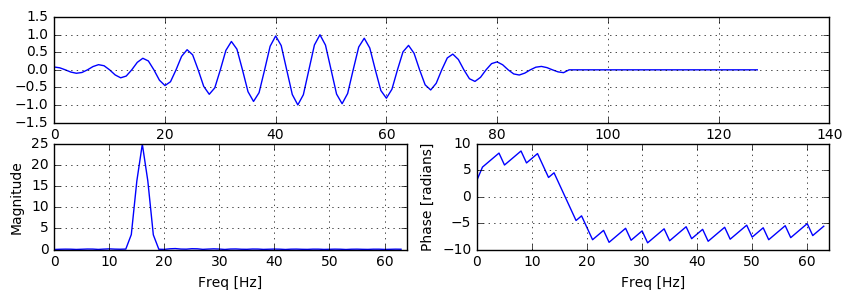

In [5]:
# compute closest power of 2 for window_size
pow_2 = np.ceil(np.log2(window_size))
fft_size = int(np.power(2, pow_2))

weighted = np.zeros(fft_size)
weighted[:window_size] = s[:window_size] * np.hamming(window_size)

plot_signal_and_spectrum(weighted, fft_size, '')


 Obtain the 512-point signal $z[n]$ by zero-padding $x[n]$. Plot its magnitude and phase spectrum

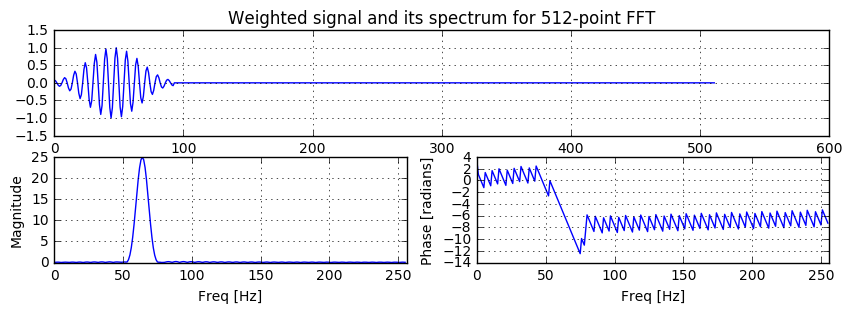

In [6]:
weighted = np.zeros(512)

weighted[:window_size] = s[:window_size] * np.hamming(window_size)

plot_signal_and_spectrum(weighted, 512, 'Weighted signal and its spectrum for 512-point FFT')
